# **Logistic Regression : Frequenist vs Bayesian Perspective**

# 0. Intro.

For Bayesian Regression, refer to : http://krasserm.github.io/2019/02/23/bayesian-linear-regression/

For Logistic Regression, refer to : https://www.marktechpost.com/2019/06/12/logistic-regression-with-a-real-world-example-in-python/

The main difference between frequenist logistic regression and bayesian logistic regression:

1. Frequenist logistic regression predicts the best-estimate of class probability using maximum likelihood principle. 

2. Bayesian logistic regression provides the whole posterior distribution from which best estimate and uncertainty can be accessed. 

# 1. Installing Libraries 

In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 4.8MB/s 
     |████████████████████████████████| 4.3MB 23.0MB/s 
     |████████████████████████████████| 296kB 54.0MB/s 
     |████████████████████████████████| 911kB 7.0MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 8.2MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp36-none-any.whl size=2667177 sha256=ff299706a622c17bb1e7615c7b578f85feb05283b76c0b7cddabb469ea640e41
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


## 2. Mounting Google Drive (for Colab Only) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Stuff/DS

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Stuff/DS


# 3. Loading Dataset

Source: https://www.kaggle.com/rakeshrau/social-network-ads

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# 4. Train-Test Split & Normalization

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 5 Logistic Regression (Fequenist Perspective)

## 5.1 Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## 5.2 Decision Boundary 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


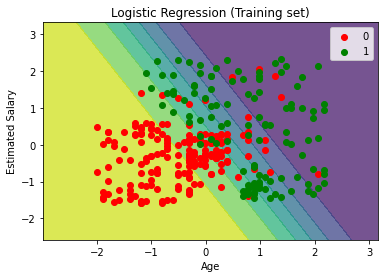

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,   step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)[:,0].reshape(X1.shape),alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


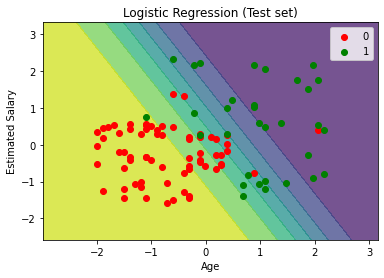

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)[:,0].reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# 6. Bayesian Logistic Regression 

In [ ]:
import pymc3 as pm
from pymc3 import summary
from pymc3 import Model, Normal, HalfNormal, model_to_graphviz
from pymc3 import NUTS, sample, find_MAP
from scipy import optimize

## 6.1 Model Definition

In [ ]:
with Model() as bayes_logist_model:

    # Priors for unknown model parameters, specifically created stochastic random variables 
    # with Normal prior distributions for the regression coefficients,
    # and a half-normal distribution for the standard deviation of the observations.
    # These are our parameters.
    pred = pm.Data("pred", X_train)
    beta0 = Normal('beta0', mu=0, sd=10)
    # Note: betas is a vector of two variables, b1 and b2, (denoted by shape=2)
    # so, in array notation, our beta1 = betas[0], and beta2=betas[1]
    betas = Normal('betas', mu=0, sd=10, shape=2) 
    #sigma = HalfNormal('sigma', sd=1)
    
    # mu is what is called a deterministic random variable, which implies that its value is completely
    # determined by its parents’ values (betas and sigma in our case). 
    # There is no uncertainty in the variable beyond that which is inherent in the parents’ values
    
    mu = beta0 + betas[0]*pred[:,0] + betas[1]*pred[:,1]
    p = pm.Deterministic("p", pm.math.invlogit(mu))
    # Likelihood function = how probable is my observed data?
    # This is a special case of a stochastic variable that we call an observed stochastic.
    # It is identical to a standard stochastic, except that its observed argument, 
    # which passes the data to the variable, indicates that the values for this variable were observed, 
    # and should not be changed by any fitting algorithm applied to the model. 
    # The data can be passed in the form of either a numpy.ndarray or pandas.DataFrame object.
    
    likelihood = pm.Bernoulli('likelihood', p=p, observed=y_train)

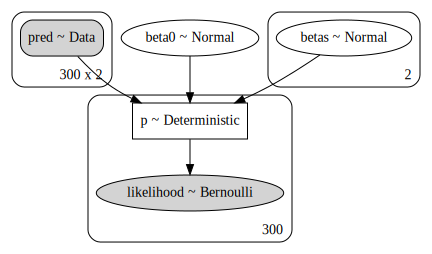

In [ ]:
## do not worry about this, it's just a nice graph to have
## you need to install python-graphviz first
# conda install -c conda-forge python-graphviz
model_to_graphviz(bayes_logist_model)

## 6.2 MCMC Process (Training)

In [ ]:
with bayes_logist_model:
 
    print(f'Starting MCMC process')
    # draw 2000 posterior samples and run the default number of chains = 4 
    trace = sample(2000, tune=1000, target_accept=0.9) 
    print(f'DONE')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Starting MCMC process


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, beta0]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:06<00:00, 890.18draws/s]


DONE


## 6.3 MCMC Sample Viz.

/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6c8bda748>,
      dtype=object)

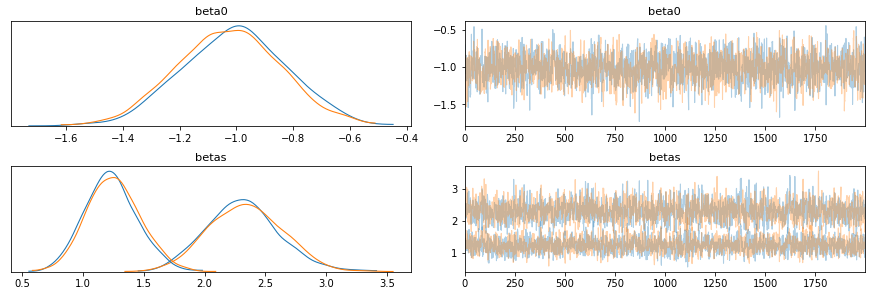

In [ ]:
from pymc3 import traceplot, compareplot, plot_posterior, forestplot
traceplot(trace,var_names = ['beta0','betas'])

In [ ]:
results = pm.summary(trace,var_names = ['beta0','betas'])  
results

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta0,-1.021,0.185,-1.369,-0.679,0.004,0.003,1979.0,1979.0,1977.0,2739.0,1.0
betas[0],2.324,0.301,1.772,2.890,0.007,0.005,1822.0,1811.0,1832.0,2413.0,1.0
betas[1],1.240,0.217,0.842,1.654,0.005,0.003,2117.0,2088.0,2127.0,2362.0,1.0


## 6.4 Bayesian Decision Boundary

### 6.4.1 Posterior Predictive Mean

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,   step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
data  = np.array([X1.ravel(), X2.ravel()]).T


In [ ]:
with bayes_logist_model:
    # update values of predictors:
    pm.set_data({"pred": data})
    # use the updated values and predict outcomes and probabilities:
    model_preds = pm.sample_posterior_predictive(
        trace, var_names=["p"], random_seed=0
    )["p"]

100%|██████████| 4000/4000 [00:53<00:00, 75.03it/s]


In [ ]:
model_preds.shape

(4000, 364672)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


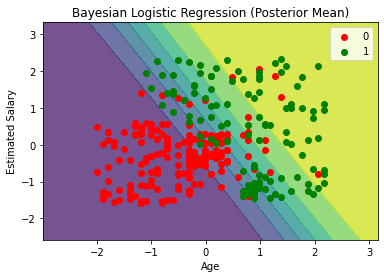

In [26]:

plt.contourf(X1, X2, model_preds.mean(axis=0).reshape(X1.shape),alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Bayesian Logistic Regression (Posterior Mean)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 6.4.2 Posterior Predictive Uncertainty

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


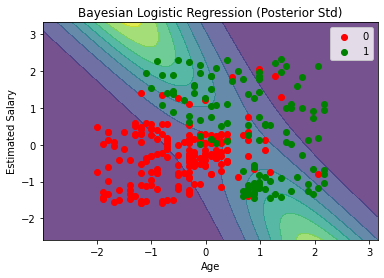

In [27]:
plt.contourf(X1, X2, model_preds.std(axis=0).reshape(X1.shape),alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Bayesian Logistic Regression (Posterior Std)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()